In [1]:
DATASET_DIR = "/kaggle/input/dicommammography"

VINDR_SELECTED_SUBSET_CSV = DATASET_DIR+'/vindr-mammo_selected_images.csv'
VINDR_BIRADS_1_2_CSV = DATASET_DIR+'/vindr-mammo_birads-1_2.csv'
VINDR_ALL_CSV = 'https://drive.usercontent.google.com/u/1/uc?id=12dZ1KqdOs79jB17uFAfvrb-J4EatpQPr&export=download'
VINDR_MULTI_VIEW_CSV = DATASET_DIR+'/vindr_cc_mlo_data.csv'
CBIS_DDSM_ALL_CSV = DATASET_DIR+'/cbis_ddsm_all.csv'
CBIS_DDSM_MULTI_VIEW_CSV = DATASET_DIR+'/cbis_ddsm_dual_view_all.csv'


VINDR_ZIP_FINDINGS_ONLY = DATASET_DIR+'/vindr-mammo_findings_only'
VINDR_ZIP_SELECTED_SUBSET = DATASET_DIR+'/VinDr-Mammo_Balanced_Subset'
VINDR_ZIP_BIRADS_1_2 = DATASET_DIR+'/VinDr-Mammo_BIRADS_1&2_Subset'
CBIS_ZIP_CALC_TRAIN = DATASET_DIR+'/CBIS-DDSM_Calc_Training'
CBIS_ZIP_CALC_TEST = DATASET_DIR+'/CBIS-DDSM_Calc_Test'
CBIS_ZIP_MASS_TRAIN = DATASET_DIR+'/CBIS-DDSM_Mass_Training'
CBIS_ZIP_MASS_TEST = DATASET_DIR+'/CBIS-DDSM_Mass_Test'

cbis_zip_list = [CBIS_ZIP_MASS_TRAIN, CBIS_ZIP_CALC_TRAIN, CBIS_ZIP_MASS_TEST, CBIS_ZIP_CALC_TEST]
label_index = {"BI-RADS 0": 0.0,"BI-RADS 1":1.0,"BI-RADS 2":2.0,"BI-RADS 3":3.0,"BI-RADS 4":4.0,"BI-RADS 5":5.0,}
index_label = {val:key for key,val in label_index.items()}

import os
import pandas as pd
import numpy as np
import tensorflow as tf

columns = ['pair_id', 'image_path_CC', 'zip_file_CC', 'BI_RADS_CC',
                      'image_path_MLO',  'zip_file_MLO', 'BI_RADS_MLO',
           'CC_MLO_Same_BIRADS']
vindr_multi_view = pd.read_csv(VINDR_MULTI_VIEW_CSV)
vindr_multi_view['pair_id'] = vindr_multi_view.apply(lambda row: f"{row['study_id']}_{row['laterality']}" , axis=1)
vindr_multi_view = vindr_multi_view.loc[:,columns]
cbis_multi_view = pd.read_csv(CBIS_DDSM_MULTI_VIEW_CSV)\
                  .rename(columns={
                      'subset_zip_CC':'zip_file_CC',
                      'subset_zip_MLO':'zip_file_MLO',
                      'assessment_CC':'BI_RADS_CC',
                      'assessment_MLO':'BI_RADS_MLO'
                      })
cbis_multi_view = cbis_multi_view.loc[:,columns]

all_multi_view_df = pd.concat([vindr_multi_view, cbis_multi_view]).reset_index(drop=True)

def normalize_birads(row):
    if row['BI_RADS_CC'] in label_index and row['BI_RADS_MLO'] in label_index:
        row['BI_RADS_CC'] = label_index[row['BI_RADS_CC']]
        row['BI_RADS_MLO'] = label_index[row['BI_RADS_MLO']]
        return row
    else:
        row['BI_RADS_CC'] = float(row['BI_RADS_CC'])
        row['BI_RADS_MLO'] = float(row['BI_RADS_MLO'])
        return row
    
def kaggle_zipfile_path(row):
    for view in ['CC', 'MLO']:
        orig_zip_file = row[f'zip_file_{view}']
        if not isinstance(orig_zip_file, str):
            continue
        kaggle_filename = orig_zip_file.split('/')[-1].replace('.zip','_zip').replace('&','')
        kaggle_zip_file = f"{DATASET_DIR}/{kaggle_filename}"
        row[f'zip_file_{view}'] = kaggle_zip_file
    return row

all_multi_view_df = all_multi_view_df.apply(normalize_birads, axis=1)
all_multi_view_df = all_multi_view_df.apply(kaggle_zipfile_path, axis=1)
all_multi_view_df = all_multi_view_df.dropna().reset_index(drop=True)
all_multi_view_df['BI_RADS_MAX'] = all_multi_view_df.apply(lambda row: max(row['BI_RADS_CC'], row['BI_RADS_MLO']), axis=1)
all_multi_view_df

2024-07-01 07:54:35.229004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 07:54:35.229137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 07:54:35.385052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,pair_id,image_path_CC,zip_file_CC,BI_RADS_CC,image_path_MLO,zip_file_MLO,BI_RADS_MLO,CC_MLO_Same_BIRADS,BI_RADS_MAX
0,0025a5dc99fd5c742026f0b2b030d3e9_L,vindr-mammo/451562831387e2822923204cf8f0873e.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,vindr-mammo/2ddfad7286c2b016931ceccd1e2c7bbc.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,True,1.0
1,0025a5dc99fd5c742026f0b2b030d3e9_R,vindr-mammo/fcf12c2803ba8dc564bf1287c0c97d9a.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,vindr-mammo/47c8858666bcce92bcbd57974b5ce522.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,True,1.0
2,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_L,vindr-mammo/3704f91985dcbc69f6ac2803523d1ecb.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/7fc1f1bb8bb1a7efaf7104e49c4d8b86.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0
3,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_R,vindr-mammo/c4ce68631bf70949570ded31a3c69e60.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/16e58fc1d65fa7587247e6224ee96527.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0
4,0034765af074f93ed33d5e8399355caf_L,vindr-mammo/68f09c18925a66ef2840d4a62f237b31.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/b664cf1e7c968896144a3a2005cd3eb4.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0
...,...,...,...,...,...,...,...,...,...
2688,P_02460_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,True,5.0
2689,P_02508_LEFT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,4.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,4.0,True,4.0
2690,P_02518_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,True,5.0
2691,P_02559_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,3.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,3.0,True,3.0


## balancing dataset

In [2]:
ds = all_multi_view_df.copy()
birads_counts = ds.BI_RADS_MAX.value_counts()
print('\n'.join([f"{label} : {birads_counts.get(i)}" for label, i in label_index.items()]))

BI-RADS 0 : None
BI-RADS 1 : 464
BI-RADS 2 : 416
BI-RADS 3 : 500
BI-RADS 4 : 974
BI-RADS 5 : 339


In [ ]:
#get splits from previous version


# png_images = np.unique([['_'.join(filename.split('_')[:-3]), filename.split('_')[-1].split('.')[0]] 
#                       for filename in os.listdir('/kaggle/input/multi-view-dataset-v2/images')], axis=0)
# png_images = pd.DataFrame(png_images, columns=['pair_id', 'split'])
# full_ds = pd.merge(ds, png_images, on='pair_id', how='left')
# print("Full dataset")
# print("nulls = ",full_ds.split.isna().sum())
# birads_counts = full_ds.BI_RADS_MAX.value_counts()
# split_counts = full_ds.split.value_counts()
# print('\n'.join([f"{label} : {birads_counts.get(i)}" for label, i in label_index.items()]))
# print('\n'.join([f"{split} : {split_counts.get(i)}" for i, split in enumerate(['train', 'sisa', 'valid'])]))

In [43]:
lowest_count = birads_counts.min()
lowest_count_birads = birads_counts.argmin() + 1.0
ds['split'] = "sisa"
def train_val_split(_df):
    split = round(lowest_count*0.2) # splitting to 5-fold / 20% data each fold
    start_index = 0
    for i in range(5):
        _df.iloc[start_index:(i+1)*split,-1] = f'fold-{i}'
        start_index+=split
    return _df

kfold_ds = ds.copy()
low_birads = kfold_ds.loc[ds.BI_RADS_MAX == lowest_count_birads]
kfold_ds.loc[kfold_ds.BI_RADS_MAX == lowest_count_birads] = train_val_split(low_birads)
for key in index_label:
    if key == lowest_count_birads or key == 0.0:
        continue
    biradn = train_val_split(kfold_ds.loc[kfold_ds.BI_RADS_MAX == key].sample(lowest_count))
    kfold_ds.iloc[biradn.index,:] = biradn

kfold_ds

,pair_id,image_path_CC,zip_file_CC,BI_RADS_CC,image_path_MLO,zip_file_MLO,BI_RADS_MLO,CC_MLO_Same_BIRADS,BI_RADS_MAX,split
0,0025a5dc99fd5c742026f0b2b030d3e9_L,vindr-mammo/451562831387e2822923204cf8f0873e.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,vindr-mammo/2ddfad7286c2b016931ceccd1e2c7bbc.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,True,1.0,sisa
1,0025a5dc99fd5c742026f0b2b030d3e9_R,vindr-mammo/fcf12c2803ba8dc564bf1287c0c97d9a.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,vindr-mammo/47c8858666bcce92bcbd57974b5ce522.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,True,1.0,sisa
2,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_L,vindr-mammo/3704f91985dcbc69f6ac2803523d1ecb.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/7fc1f1bb8bb1a7efaf7104e49c4d8b86.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0,fold-3
3,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_R,vindr-mammo/c4ce68631bf70949570ded31a3c69e60.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/16e58fc1d65fa7587247e6224ee96527.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0,fold-3
4,0034765af074f93ed33d5e8399355caf_L,vindr-mammo/68f09c18925a66ef2840d4a62f237b31.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/b664cf1e7c968896144a3a2005cd3eb4.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0,sisa
...,...,...,...,...,...,...,...,...,...,...
2688,P_02460_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,True,5.0,fold-4
2689,P_02508_LEFT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,4.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,4.0,True,4.0,fold-1
2690,P_02518_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,True,5.0,fold-4
2691,P_02559_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,3.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,3.0,True,3.0,fold-0


In [44]:
print(kfold_ds.split.value_counts())
for i in range(5):
    fold_birads_counts = kfold_ds[kfold_ds.split == f"fold-{i}"].BI_RADS_MAX.value_counts()
    print(f"fold-{i} birads".center(30, "-"))
    print('\n'.join([f"{label} : {fold_birads_counts.get(i)}" for label, i in label_index.items()]))
fold_birads_counts = kfold_ds[kfold_ds.split == "sisa"].BI_RADS_MAX.value_counts()
print(f"fold-sisa birads".center(30, "-"))
print('\n'.join([f"{label} : {fold_birads_counts.get(i)}" for label, i in label_index.items()]))

split
sisa      998
fold-3    340
fold-2    340
fold-1    340
fold-0    340
fold-4    335
Name: count, dtype: int64
--------fold-0 birads---------
BI-RADS 0 : None
BI-RADS 1 : 68
BI-RADS 2 : 68
BI-RADS 3 : 68
BI-RADS 4 : 68
BI-RADS 5 : 68
--------fold-1 birads---------
BI-RADS 0 : None
BI-RADS 1 : 68
BI-RADS 2 : 68
BI-RADS 3 : 68
BI-RADS 4 : 68
BI-RADS 5 : 68
--------fold-2 birads---------
BI-RADS 0 : None
BI-RADS 1 : 68
BI-RADS 2 : 68
BI-RADS 3 : 68
BI-RADS 4 : 68
BI-RADS 5 : 68
--------fold-3 birads---------
BI-RADS 0 : None
BI-RADS 1 : 68
BI-RADS 2 : 68
BI-RADS 3 : 68
BI-RADS 4 : 68
BI-RADS 5 : 68
--------fold-4 birads---------
BI-RADS 0 : None
BI-RADS 1 : 67
BI-RADS 2 : 67
BI-RADS 3 : 67
BI-RADS 4 : 67
BI-RADS 5 : 67
-------fold-sisa birads-------
BI-RADS 0 : None
BI-RADS 1 : 125
BI-RADS 2 : 77
BI-RADS 3 : 161
BI-RADS 4 : 635
BI-RADS 5 : None


## processing DICOM

In [13]:
#@title function to load dicom
# core function from :
# https://www.kaggle.com/code/raddar/convert-dicom-to-np-array-the-correct-way/notebook

import cv2
import pydicom
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut
from io import BytesIO

class D:
    voi_lut = True
    fix_monochrome = True
    crop = 'otsu'
    resize = 512
    padding = True

    
def image_resize(image, width = None, height = None, inter = cv2.INTER_LINEAR):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

def crop_coords(img):
    """
    Crop ROI from image.
    """
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img, (3, 3), 0.1)
    img_16bit = cv2.normalize(blur, None, 0, 65535, cv2.NORM_MINMAX, dtype=cv2.CV_16U) 
    _, breast_mask = cv2.threshold(img_16bit,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(cnts, key = cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    return (x, y, w, h)

def otsu_roi_crop(data):
    xmin, ymin, w, h = crop_coords(data)
    xmax = xmin + w
    ymax = ymin + h
    data = data[ymin:ymax,xmin:xmax]
    return data

def pad_to_9_16(img, laterality):
    height, width = img.shape[:2]
    target_ratio = 9 / 16

    if width / height > target_ratio:  # Image is wider than 9:16
        new_width = width
        new_height = int(width / target_ratio)
        top_bottom_padding = (new_height - height) // 2
        left_right_padding = 0
    else:  # Image is taller than 9:16
        new_width = int(height * target_ratio)
        new_height = height
        top_bottom_padding = 0
        left_right_padding = (new_width - width) // 2

    # Create a blank image with the target dimensions
    padded_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Copy the original image onto the padded image with the calculated offsets
    padded_img[top_bottom_padding:top_bottom_padding + height, 
               left_right_padding:left_right_padding + width] = img

    return padded_img

def read_dicom(path, voi_lut = True, fix_monochrome = True, pad = False, crop = None,base_size=None, resize=0):
    dicom = pydicom.read_file(path)
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)

    sum_L = np.sum(data[:,:2])
    sum_R = np.sum(data[:,-2:])
    laterality = 'L' if sum_L > sum_R else 'R'
    #otsu roi cropping
    if crop == 'otsu':
        data = otsu_roi_crop(data)
     #padding
    if pad:
        data = pad_to_9_16(data, laterality)
    #resize
    if resize != 0:
        h, w = data.shape
        resize = 25 if resize < 25 else resize
        data = cv2.resize(data, (288, 512), interpolation = cv2.INTER_LINEAR)
        
    return data, laterality

def load_dicom_from_zip(image_path, zipfile_path, return_laterality=False):
    kwargs = {
      "voi_lut" : D.voi_lut,
      "fix_monochrome" : D.fix_monochrome,
      "crop" : D.crop,
      "resize" : D.resize,
      "pad": D.padding,
  }
    with zipfile.ZipFile(zipfile_path, "r") as zip_ref:
        with zip_ref.open(image_path) as f:
            image_bytes = BytesIO(f.read())
    dicom_data, laterality = read_dicom(image_bytes, **kwargs)
    del image_bytes
    if return_laterality:
        return dicom_data, laterality
    else:
        return dicom_data
0

0

In [ ]:
#SAVE AS PNGs
import os
import multiprocessing as mp
from tqdm.auto import tqdm

base_dir = '/kaggle/working/images'
!rm -rf {base_dir}
os.makedirs(base_dir, exist_ok=True)
def load_and_save(row):
    index, row = row
    label = int(row['BI_RADS_MAX'])
    split = row['split']
    for view in ["CC", "MLO"]:
        filename = os.path.join(base_dir, f"{row['pair_id']}_{label}_{view}_{split}.png")
        if os.path.exists(filename):
            continue
        zipfile_path = row[f'zip_file_{view}']
        image_path = row[f'image_path_{view}']
        img_data = load_dicom_from_zip(image_path, zipfile_path)
        cv2.imwrite(
            filename,
            img_data
            )
    return None

# start process
with mp.Pool(mp.cpu_count()) as p:
    iterrows = list(kfold_ds.iterrows())
    image_generator = tqdm(p.imap_unordered(load_and_save, iterrows), total=len(iterrows), desc="creating images data")
    list(image_generator)

In [12]:
import os
import zipfile

base_dir = './example_dicom'
!rm -rf {base_dir}
os.makedirs(base_dir, exist_ok=True)

def save_dicom(image_path, zipfile_path, save_filename):
    with zipfile.ZipFile(zipfile_path, "r") as zip_ref:
        with zip_ref.open(image_path) as f:
            image_bytes = f.read()
    with open(save_filename, "wb") as f:
        f.write(image_bytes)
    
n_data_to_save = 10
sample_df = all_multi_view_df.sample(n_data_to_save)
for _, row in sample_df.iterrows():
    label = int(row['BI_RADS_MAX'])
    for view in ["CC", "MLO"]:
        save_filename = os.path.join(base_dir, f"{row['pair_id']}_{label}_{view}.dicom")
        if os.path.exists(save_filename):
            continue
        zipfile_path = row[f'zip_file_{view}']
        image_path = row[f'image_path_{view}']
        save_dicom(image_path, zipfile_path, save_filename)
        
!tar -zcvf example_dicom.tar.gz {base_dir} && rm -rf {base_dir}

./example_dicom/
./example_dicom/P_01651_RIGHT_5_MLO.dicom
./example_dicom/P_00596_RIGHT_5_MLO.dicom
./example_dicom/P_00981_LEFT_4_MLO.dicom
./example_dicom/7923de65390f4cfe6fb047515f9474f0_R_3_CC.dicom
./example_dicom/P_00981_LEFT_4_CC.dicom
./example_dicom/P_01483_LEFT_5_CC.dicom
./example_dicom/P_01483_LEFT_5_MLO.dicom
./example_dicom/7923de65390f4cfe6fb047515f9474f0_R_3_MLO.dicom
./example_dicom/0baef459a10e51c65302ddb63012c147_R_4_CC.dicom
./example_dicom/P_01825_RIGHT_3_MLO.dicom
./example_dicom/0baef459a10e51c65302ddb63012c147_R_4_MLO.dicom
./example_dicom/P_01792_RIGHT_4_MLO.dicom
./example_dicom/P_01060_RIGHT_4_MLO.dicom
./example_dicom/P_01060_RIGHT_4_CC.dicom
./example_dicom/P_01651_RIGHT_5_CC.dicom
./example_dicom/P_00596_RIGHT_5_CC.dicom
./example_dicom/P_01868_LEFT_3_MLO.dicom
./example_dicom/P_01868_LEFT_3_CC.dicom
./example_dicom/P_01792_RIGHT_4_CC.dicom
./example_dicom/P_01825_RIGHT_3_CC.dicom


In [10]:
!rm -rf images

images/003700f3c960e0b9bca2b8437c3dbf05_R_1_MLO_sisa.png


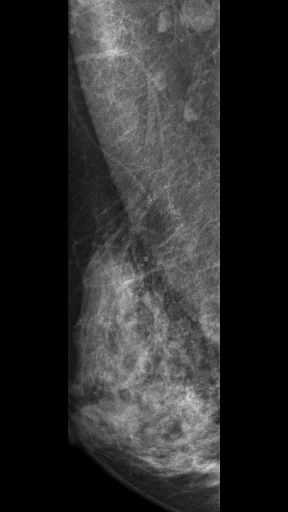

In [56]:
import os
from random import choice
from IPython.display import Image

images = os.listdir("images")
img_path = os.path.join("images", choice(images))
print(img_path)
Image(img_path)

In [ ]:
# def get_label(file_path):
#     path_parts = tf.strings.split(file_path, os.path.sep)
#     filename_parts = tf.strings.split(path_parts[-1], "_")
#     label = tf.strings.to_number(filename_parts[-3],out_type=tf.dtypes.int32)

#     return tf.one_hot(label-1,5)

# def decode_img(img):
#     img = tf.io.decode_png(img, channels=3)
#     # Resize the image to the desired size
#     return tf.image.resize(img, (512,288))

# def process_image(file_path):
#     # Load the raw data from the file as a string
#     img = tf.io.read_file(file_path)
#     img = decode_img(img)
#     return img

# splits = ['train', 'valid', 'sisa']
# view_map = {"Examined":"CC", "Aux":"MLO"}
# dict_dataset = { split:[{v:None for v in view_map},[]] for split in splits}
# images_dir = '/kaggle/working/images'

# #https://www.tensorflow.org/tutorials/load_data/images?hl=en#using_tfdata_for_finer_control
# for split in splits:
#     for view in view_map:
#         dict_dataset[split][0][view] = tf.data.Dataset.list_files(f"{images_dir}/*_{view_map[view]}_{split}.png",shuffle=False)
# for split in splits:
#     for view in view_map:
#         ds = dict_dataset[split][0][view]
#         print(f'{view}-{split} cardinality :',ds.cardinality().numpy())
#         print('examples :')
#         for f in ds.take(2):
#             print(f.numpy())
#         print()
        
# for split in splits:
#     dict_dataset[split][1] = dict_dataset[split][0][view].map(get_label, num_parallel_calls=tf.data.AUTOTUNE)
#     for view in view_map:
#         dict_dataset[split][0][view] = dict_dataset[split][0][view].map(process_image, num_parallel_calls=tf.data.AUTOTUNE)

# for image in dict_dataset['train'][0]['Examined'].take(5):
#     print("Image shape: ", image.numpy().shape)
# for label in  dict_dataset['train'][1].take(5):
#     print("Label: ", label.numpy())
    
# print("\nunique labels :\n",np.unique(list(dict_dataset['valid'][1].as_numpy_iterator()), axis=0))

# train_ds = tf.data.Dataset.zip(tuple(dict_dataset['train']))
# validation_ds = tf.data.Dataset.zip(tuple(dict_dataset['valid']))
# test_ds = tf.data.Dataset.zip(tuple(dict_dataset['sisa']))


# del dict_dataset
# train_ds

In [ ]:
# def _bytes_feature(value):
#     """Returns a bytes_list from a string / byte."""
#     if isinstance(value, type(tf.constant(0))):  # if value is tensor
#         value = value.numpy()  # get value of tensor
#     return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# def serialize_example(image_dict, label):
#     feature = {
#       'Examined': _bytes_feature(image_dict['Examined'].numpy().tobytes()),
#       'Aux': _bytes_feature(image_dict['Aux'].numpy().tobytes()),
#       'label': _bytes_feature(label.numpy().tobytes())  # Assuming one-hot encoded
#     }
#     example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
#     return example_proto.SerializeToString()

# # Function to write TFRecord file
# def write_tfrecord(dataset, output_file):
#     with tf.io.TFRecordWriter(output_file) as writer:
#         for image_dict, label in dataset:
#             example = serialize_example(image_dict, label)
#             writer.write(example)

# # Create separate TFRecord files for training and validation
# write_tfrecord(train_ds, 'train.tfrecord')
# write_tfrecord(validation_ds, 'valid.tfrecord')
# write_tfrecord(test_ds, 'sisa.tfrecord')